# Regressions
### Chris Ball
#### 3.12.19 (my third wedding anniversary)

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime as dt
import requests

In [2]:
# render visualizations nicely
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [24.0, 16.0]

In [3]:
#comment out and see the warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'Z' #stock symbol

In [5]:
res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

In [6]:
df.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,27.74,0.000000,0.000,27.74,2015-08-03,28.82,"Aug 3, 15",25.72,27.65,144677,144677,27.4812
1,-1.94,-0.069935,-6.994,25.80,2015-08-04,27.03,"Aug 4, 15",24.61,27.00,129608,129608,25.7460
2,-0.56,-0.090123,-2.171,25.24,2015-08-05,27.47,"Aug 5, 15",24.56,27.11,107658,107658,25.6043
3,1.71,-0.028479,6.775,26.95,2015-08-06,26.95,"Aug 6, 15",22.99,24.81,73134,73134,25.8684
4,-0.45,-0.044701,-1.670,26.50,2015-08-07,27.50,"Aug 7, 15",24.20,27.50,52246,52246,26.1660


In [7]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,9.070000e+02,907.000000
mean,0.044212,0.356112,0.081677,37.618534,38.254591,36.923566,37.573925,1.725845e+06,1.725845e+06,37.595557
std,1.409760,0.370401,2.850673,10.274930,10.323059,10.163934,10.245446,1.687025e+06,1.687025e+06,10.250112
min,-11.050000,-0.422855,-26.925000,16.010000,16.610000,15.360000,15.670000,5.141000e+04,5.141000e+04,15.896500
25%,-0.460000,0.111932,-1.203500,30.845000,31.775000,30.265000,30.915000,9.127695e+05,9.127695e+05,30.974600
50%,0.060000,0.321197,0.162000,36.650000,37.230700,36.170000,36.710000,1.335430e+06,1.335430e+06,36.588000
75%,0.520000,0.570836,1.378500,43.575000,44.275000,42.820000,43.520000,1.993290e+06,1.993290e+06,43.416650
max,27.740000,1.363735,26.370000,65.570000,65.700000,64.395000,65.090000,2.293526e+07,2.293526e+07,65.269900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
change              907 non-null float64
changeOverTime      907 non-null float64
changePercent       907 non-null float64
close               907 non-null float64
date                907 non-null datetime64[ns]
high                907 non-null float64
label               907 non-null object
low                 907 non-null float64
open                907 non-null float64
unadjustedVolume    907 non-null int64
volume              907 non-null int64
vwap                907 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 85.1+ KB


In [9]:
# generate/store test data
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size = 0.3, random_state=42)

Text(0.5, 1.0, 'Training Set')

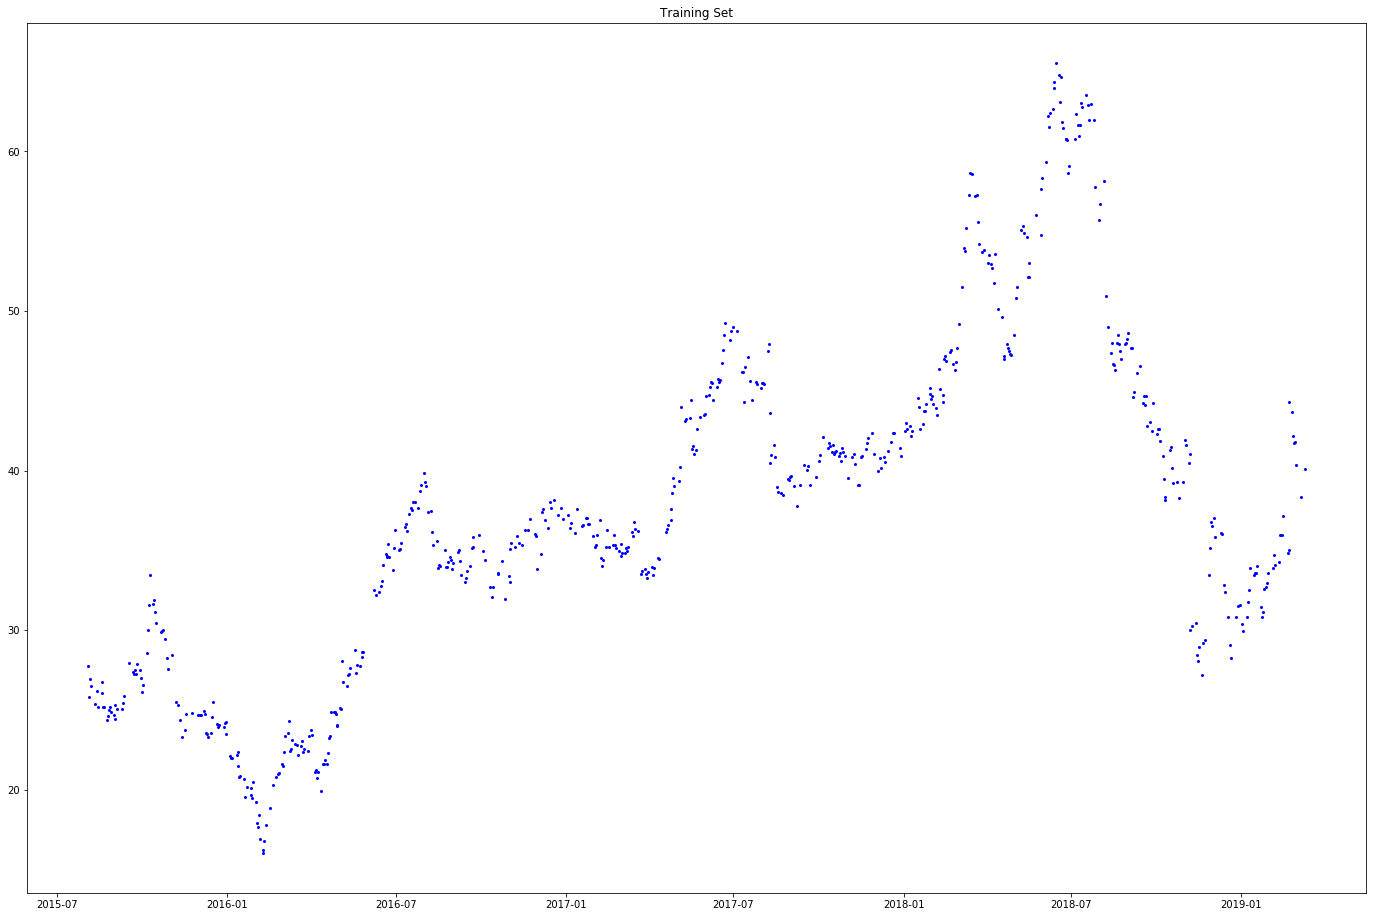

In [10]:
plt.plot(X_train, Y_train, 'bo', markersize=2)
plt.title('Training Set')

Text(0.5, 1.0, 'Test Set')

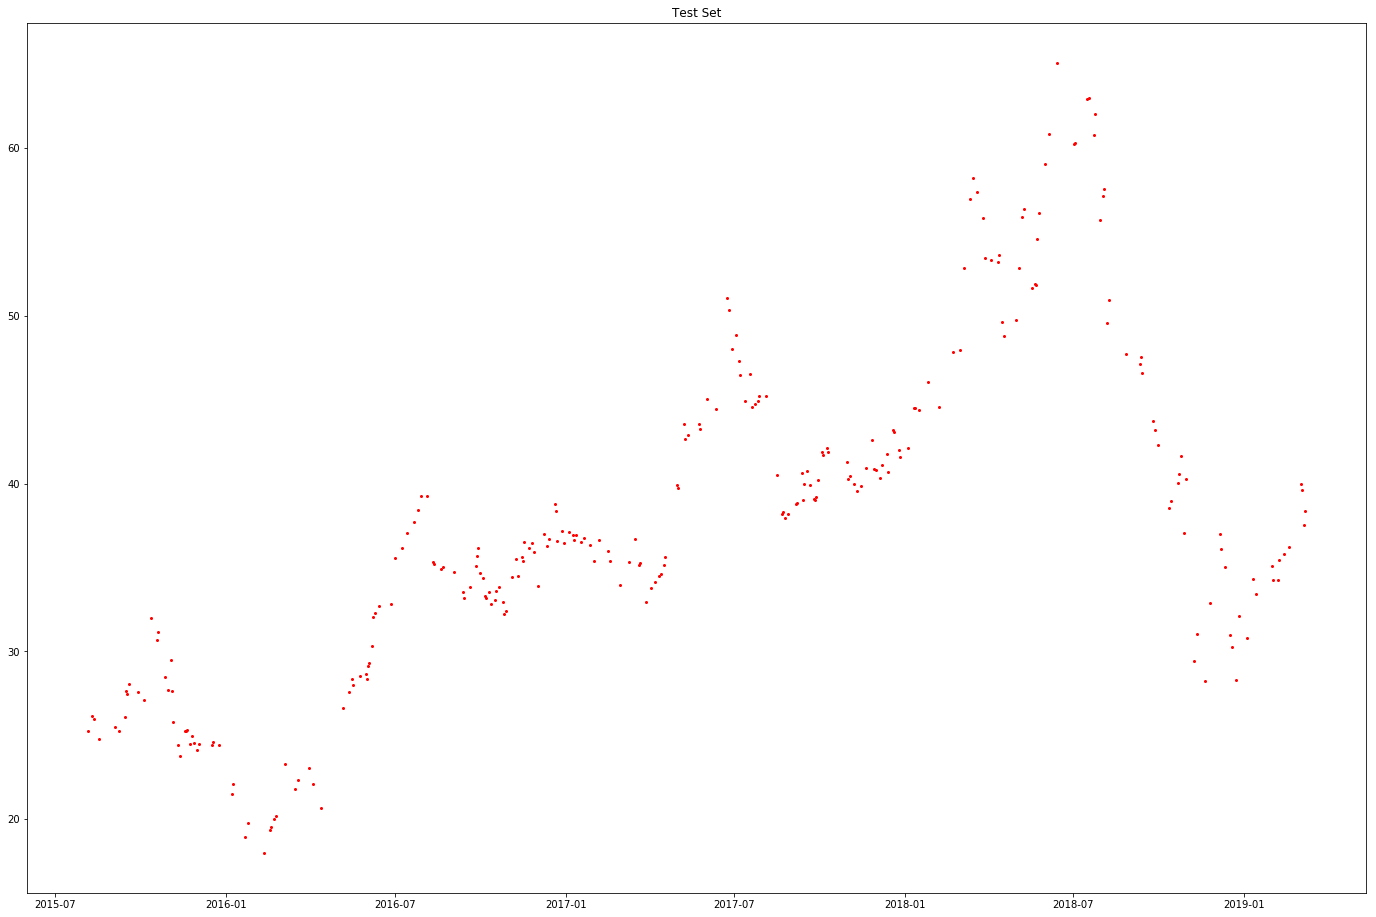

In [11]:
plt.plot(X_test, Y_test, 'ro', markersize=2)
plt.title('Test Set')

In [12]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 3)

In [13]:
# yet another date tweak to determine dimensions of horizontal line
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [14]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

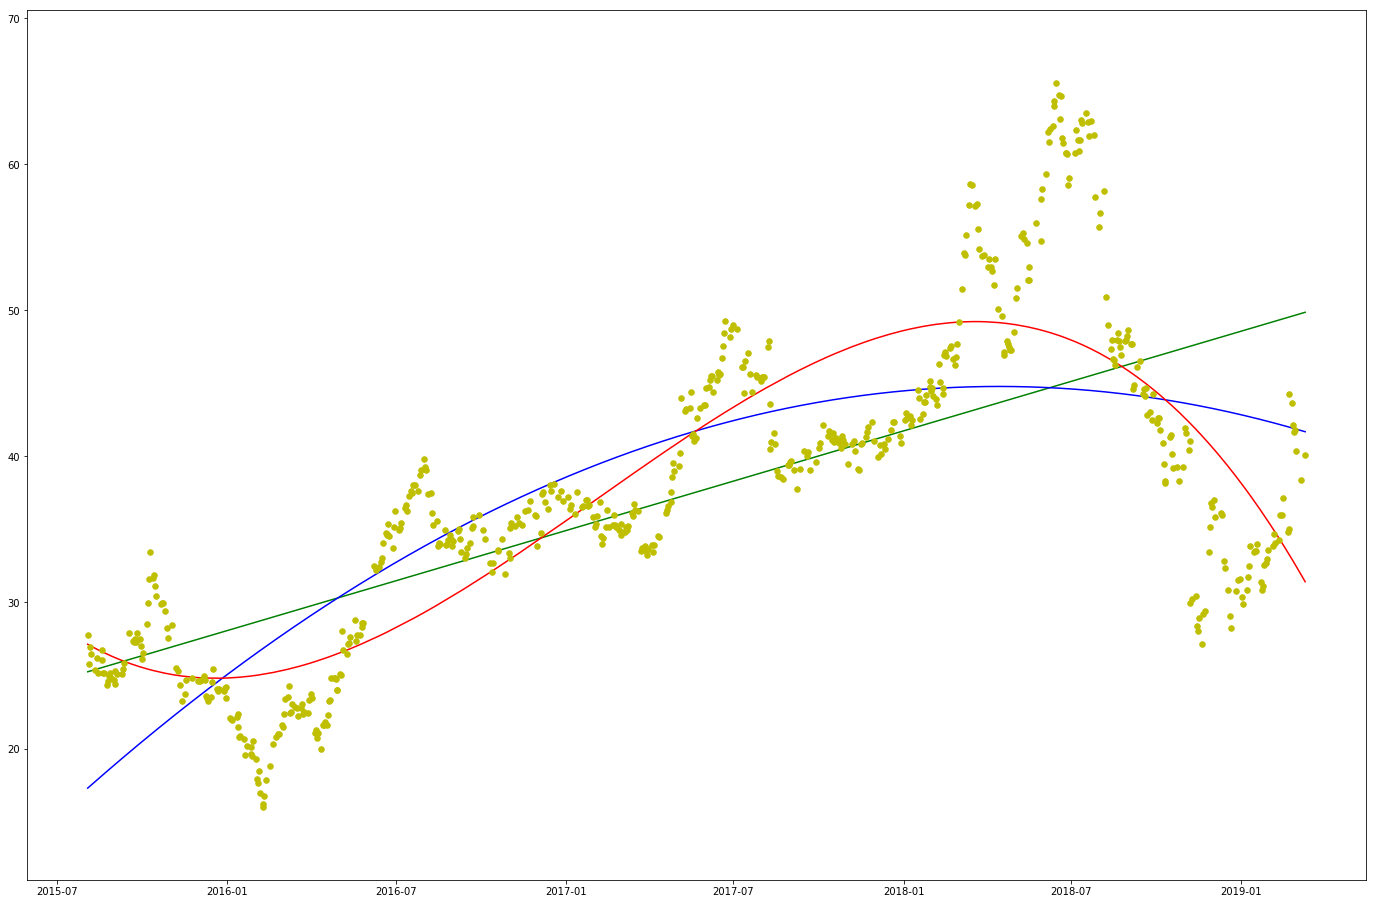

In [15]:
plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

plt.plot(X_train, Y_train, 'y.', markersize=11)

### Conclusions
- The first conclusion I would make is that Zillow's stock seems to trend closely with the US housing market, which makes sense, considering that's the market they're most concerned with.

- My second observation is that every time their stock has dropped in the past 5 years, it has risen about 25% higher than the previous high within 1 year of the drop.

- Lastly, it's worth noting that Zillow's stock appears to drop at least 10-15% during the summer every year.